In [1]:
!apt-get install libncurses5
!pip install -q tellurium==2.2.8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libncurses5
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 96.9 kB of archives.
After this operation, 330 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libncurses5 amd64 6.2-0ubuntu2.1 [96.9 kB]
Fetched 96.9 kB in 1s (192 kB/s)
Selecting previously unselected package libncurses5:amd64.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../libncurses5_6.2-0ubuntu2.1_amd64.deb ...
Unpacking libncurses5:amd64 (6.2-0ubuntu2.1) ...
Setting up libncurses5:amd64 (6.2-0ubuntu2.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

## Now restart the runtime!

You have to restart the runtime any time you replace an old version of a package with a new version, and we just replaced the old version of numpy with a newer one. After you do so, the next block of code will succeed.

In [1]:
import numpy
import sys

if "1.25" not in numpy.__version__:
    print("[Error] Wrong version of numpy (" + numpy.__version__ + ").  Restart the runtime to continue; it was probably installed but not re-loaded.")
    sys.exit(1)

import roadrunner
if "2.4" not in roadrunner.__version__:
    print("[Error] Wrong version of roadrunner (" + roadrunner.__version__ + ").  Restart the runtime to continue; it was probably installed but not re-loaded.  If that doesn't work, uninstall roadrunner and re-install it; the 'rrplugins' package copies files it shouldn't, and messes things up.")
    sys.exit(1)

import tellurium as te
te.printVersionInfo()

tellurium : 2.2.8
roadrunner : 2.4.0
antimony : 2.13.4
libsbml : 5.20.1
libsedml : 2.0.32
phrasedml : 1.3.0


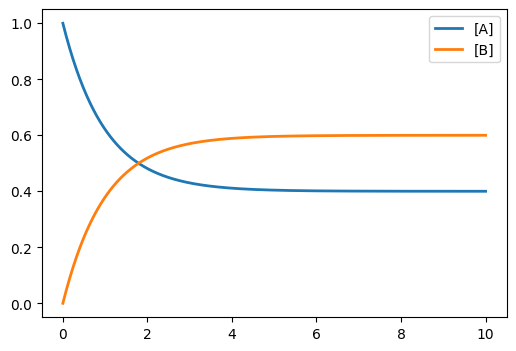

In [8]:
# Simple first order mass action kinetics
import tellurium as te
model = '''
A -> B; k1*A - k_1*B
k1 = .6
k_1 = .4
A = 1
'''
rr = te.loada(model)
rr.simulate(0, 10, 500)
rr.plot()

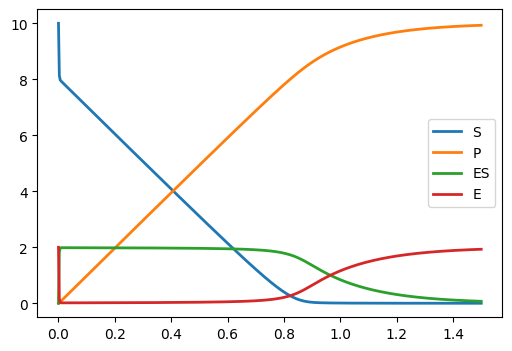

In [16]:
# Enzyme catalysis - full kinetics
import tellurium as te

model = '''
E + S -> ES; k1*E*S - k_1*ES
ES -> E + P; k2*ES

k1 = 100
k_1 = 1
k2 = 5

S = 10
E = 2
'''

rr = te.loada(model)
rr.simulate(0, 1.5, 500, selections=['time', 'S', 'P', 'ES', 'E'])
rr.plot()

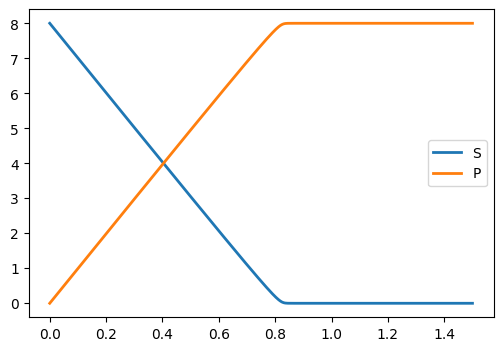

In [10]:
# Enzyme catalysis - Steady-State approximation
import tellurium as te

model = '''
S -> P; Vm*S/(Km + S)

Vm = 10
Km = 5.1/100

S = 8
'''

rr = te.loada(model)
rr.simulate(0, 1.5, 500, selections=['time', 'S', 'P'])
rr.plot()

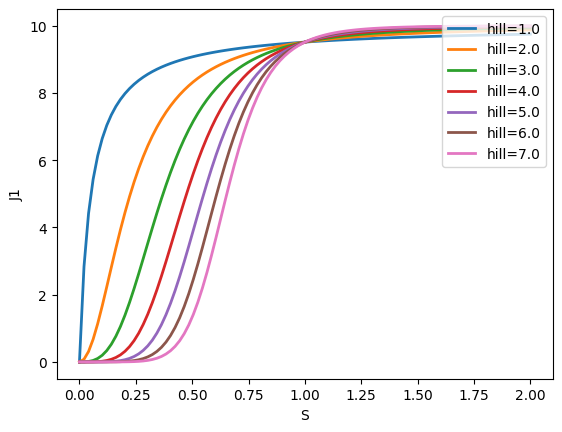

In [14]:
# Hill kinetics
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

model = '''
J1: S -> P; Vm*(S^h)/(Km + S^h)
Vm = 10
Km = 5.1/100
h = 1
S = 0
'''
r = te.loada(model)
for i in range (1,8):
  numbers = np.linspace (0, 2, 100)
  result = np.empty ([0,2])
  for value in numbers:
      r.S = value
      row = np.array ([value, r.J1])
      result = np.vstack ((result, row))
  te.plotArray(result, show=False, labels=['hill={}'.format(r.h)],
               resetColorCycle=False,
               xlabel='S', ylabel="J1",)
              #  title="Reaction rate vs hill coefficient",)
              #  ylim=[-0.1, 11], grid=True)

  r.h = r.h + 1;
plt.show()

# rr = te.loada(model)
# rr.simulate(0, 10)
# rr.plot()

In [ ]:
# Exercise 1
